<a href="https://colab.research.google.com/github/Samuel-Buarque/anime-data-analysis/blob/main/Analysis_of_Anime_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probability & Statistics Analysis of Anime Dataset



## Introduction
In this notebook, we will analyze an anime dataset sourced from Kaggle. The dataset includes various attributes related to anime shows, such as their scores, types, and popularity rankings. We aim to explore different probability concepts using this dataset, including simple probabilities, unions, intersections, complements, differences, conditional probabilities, and Bayes' theorem.

## Dataset Overview
The dataset contains the following columns:
- **Name**: Name of the anime.
- **Type**: Type (e.g., TV, Movie).
- **Score**: Rating given to the anime.
- **Score Rank**: Rank based on the score.
- **Popularity Rank**: Rank based on popularity.
- **Air Date**: Release date of the anime.
- **Studio**: Studio responsible for the anime.
- **Num. of episodes**: Number of episodes.
- **Genres**: Genres of the anime.
- **Theme(s)**: Themes addressed in the anime.
- **Demographic**: Target demographic.

NOTE: Hidden cells refer to loading and adjusting the dataset



In [37]:
#Loading Modules
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

#Initializing DataSet
file_path = '/content/sample_data/mal_top2000_anime.csv'
anime_data = pd.read_csv(file_path)

anime_data.head()

,Unnamed: 0,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen
1,1,Spy x Family,TV,9.09,2,350,"Apr 9, 2022 to ?","['Wit Studio', ' CloverWorks']",12,"['Action', 'Comedy']",['Childcare'],Shounen
2,2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,"Apr 29, 2019 to Jul 1, 2019",['Wit Studio'],10,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen
3,3,Steins;Gate,TV,9.08,4,13,"Apr 6, 2011 to Sep 14, 2011",['White Fox'],24,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",NaN
4,4,Gintama°,TV,9.08,5,335,"Apr 8, 2015 to Mar 30, 2016",['Bandai Namco Pictures'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen


In [38]:
anime_data.shape

(2000, 12)

In [39]:
#Removing useless collumn
anime_data = anime_data.drop(columns=['Unnamed: 0'])

#Verifing NaN values
total_nan_before = anime_data.isna().sum().sum()
print(f"NaN values: {total_nan_before}")


NaN values: 1027


In [40]:
#Dropping NaN values
anime_data = anime_data.dropna()
total_nan_after = anime_data.isna().sum().sum()
print(f"Total NaN values after removal: {total_nan_after}")

# Function to extract release date
def extract_year(date_str):
    if 'to' in date_str:
        return int(date_str.split('to')[0].strip().split()[-1])
    return int(date_str.strip().split()[-1])

# Aplicando a função para criar uma nova coluna com o ano de lançamento
anime_data['Release Year'] = anime_data['Air Date'].apply(extract_year)

Total NaN values after removal: 0


In [41]:
anime_data.shape  #Removed 1027 Rows and 1 Collumn


(973, 12)

# **1. Simple Probability**



### Explanation
Simple probability refers to the likelihood of a single event occurring. It is calculated by dividing the number of favorable outcomes by the total number of possible outcomes.

---

##Calculated Probabilities

###*1.1 - Probability of an anime having a score greater than 9*###

Let \( P(X) \) be the probability of a randomly selected anime having a score \( X > 9 \).

$P(X > 9) = \frac{\text{Number of animes with score > 9}}{\text{Total number of animes}}$

Result: **0.92%**

---
###*1.2 - Probability of an anime being of type 'TV'*

Let \( P(TV) \) be the probability of a randomly selected anime being of type 'TV'.

   $P(\text{TV}) = \frac{\text{Number of TV animes}}{\text{Total number of animes}}$

Result: **59%**

---
###*1.3 - Probability of an anime having more than 50 episodes*

Let \( P(Episodes>50) \) be the probability of a randomly selected anime having more than 50 episodes.

   $P(\text{Episodes} > 50) = \frac{\text{Number of animes with more than 50 episodes}}{\text{Total number of animes}}$

Result: **10%**

---
###*1.4 - Probability of an anime being of the genre 'Action'*

Let \( P(Action) \) be the probability of a randomly selected anime being of the genre 'Action'.

   $P(\text{Action}) = \frac{\text{Number of Action animes}}{\text{Total number of animes}}$

Result: **36%**

---
###*1.5 - Probability of an anime being of the demographic 'Shounen'*

Let \( P(Shounen) \) be the probability of a randomly selected anime being of the demographic 'Shounen'.

   $P(\text{Shounen}) = \frac{\text{Number of Shounen animes}}{\text{Total number of animes}}$

   Result: **56%**


In [42]:
# 1.1.
# Count of animes with a rating greater than 9
animes_score_greater_9 = anime_data[anime_data['Score'] > 9].shape[0]

# Total anime count
total_animes = anime_data.shape[0]

# Probability
prob_score_greater_9 = animes_score_greater_9 / total_animes

# 1.2.
# Probability of an anime being of the 'TV' type
animes_tv = anime_data[anime_data['Type'] == 'TV'].shape[0]
prob_tv_animes = animes_tv / total_animes

# 1.3.
# Probability of an anime having more than 50 episodes
animes_more_than_50_eps = anime_data[anime_data['Num. of episodes'] > 50].shape[0]
prob_animes_more_than_50_eps = animes_more_than_50_eps / total_animes

# 1.4.
# Probability of an anime being in the 'Action' genre
animes_action_genre = anime_data[anime_data['Genres'].str.contains('Action')].shape[0]
prob_action_genre = animes_action_genre / total_animes

# 1.5.
# Likelihood of an anime being in the 'Shounen' demographic
animes_shounen_demo = anime_data[anime_data['Demographic'] == 'Shounen'].shape[0]
prob_shounen_demo = animes_shounen_demo / total_animes

{
    'score > 9 Probability': prob_score_greater_9,
    'TV type probability': prob_tv_animes,
    'more than 50 episodes probability': prob_animes_more_than_50_eps,
    'Action genre probability': prob_action_genre,
    'Shounen Demographics Probability': prob_shounen_demo
}

{'score > 9 Probability': 0.009249743062692703,
 'TV type probability': 0.590955806783145,
 'more than 50 episodes probability': 0.10277492291880781,
 'Action genre probability': 0.3648509763617677,
 'Shounen Demographics Probability': 0.5652620760534429}

# **2. Union Probability**


## Union Probability: Exploring Multiple Conditions

Union probability refers to the likelihood of either one event or another event occurring. It is calculated by combining the probabilities of both events happening, subtracting the overlap if they are not mutually exclusive. Below are some probabilities calculated from a dataset of 2000 animes.

---

##**Calculated Probabilities**



### *1.1 - Probability of an anime being of the genre 'Action' or having more than 50 episodes*
<br>
Let \( P(\text{Action} \cup \text{Episodes} > 50) \) be the probability of a randomly selected anime either being of the genre 'Action' or having more than 50 episodes.


$P(\text{Action} \cup \text{Episodes} > 50) = \frac{\text{Number of Action animes or those with > 50 episodes}}{\text{Total number of animes}}$

**Result**: 42.45%


---


###*1.2 - Probability of an anime being of the genre 'Action' or being from the demographic 'Shounen'*
<br>
Let \( P(\text{Action} \cup \text{Shounen}) \) be the probability of a randomly selected anime being either of the genre 'Action' or from the demographic 'Shounen'.

$P(\text{Action} \cup \text{Shounen}) = \frac{\text{Number of Action animes or Shounen animes}}{\text{Total number of animes}}
$

**Result**:  68.65%


---

### *1.3 - Probability of an anime being released before 2000 or after 2020*
<br>
Let \( P(\text{Before 2000} \cup \text{After 2020}) \) be the probability of a randomly selected anime being released either before the year 2000 or after 2020.


$P(\text{Before 2000} \cup \text{After 2020}) = \frac{\text{Number of animes released before 2000 or after 2020}}{\text{Total number of animes}}
$

**Result**: 19.42%

---


### *1.4 - Probability of an anime being of type 'TV' or being an OVA*
<br>
Let \( P(\text{TV} \cup \text{OVA}) \) be the probability of a randomly selected anime being either of type 'TV' or an OVA.

$P(\text{TV} \cup \text{OVA}) = \frac{\text{Number of TV or OVA animes}}{\text{Total number of animes}}
$

**Result**: 72.76%


---

### *1.5 - Probability of an anime being of the genre 'Action' or being of the genre 'Adventure'*
<br>
Let \( P(\text{Action} \cup \text{Adventure} \) be the probability of a randomly selected anime being either of the genre 'Action' or the genre 'Adventure'

$P(\text{Action} \cup \text{Adventure} ) = \frac{\text{Number of Action animes or Adventure animes}}{\text{Total number of animes}}
$

**Result**: 46.66%



In [43]:
# 1. Probabilidade de um anime ser do gênero 'Action' ou ter mais de 50 episódios.
animes_action_or_more_50_eps = anime_data[(anime_data['Genres'].str.contains('Action')) | (anime_data['Num. of episodes'] > 50)].shape[0]
prob_action_or_more_50_eps = animes_action_or_more_50_eps / total_animes

# 2. Probabilidade de um anime ser do gênero 'Action' ou do demográfico 'Shounen'.
animes_action_or_shounen = anime_data[(anime_data['Genres'].str.contains('Action')) | (anime_data['Demographic'] == 'Shounen')].shape[0]
prob_action_or_shounen = animes_action_or_shounen / total_animes

# 3. Probabilidade de um anime ter sido lançado antes dos anos 2000 ou depois de 2020
animes_before_2000_or_after_2020 = anime_data[(anime_data['Release Year'] < 2000) | (anime_data['Release Year'] > 2020)].shape[0]
prob_before_2000_or_after_2020 = animes_before_2000_or_after_2020 / total_animes

# 4. Probabilidade de um anime ser do tipo 'TV' ou ser OVA.
animes_tv_or_ova = anime_data[(anime_data['Type'] == 'TV') | (anime_data['Type'] == 'OVA')].shape[0]
prob_tv_or_ova = animes_tv_or_ova / total_animes

# 5. Probabilidade de um anime ser do gênero 'Action' ou do genero aventura
animes_action_or_score_greater_9 = anime_data[(anime_data['Genres'].str.contains('Action')) | (anime_data['Genres'].str.contains('Adventure'))].shape[0]
prob_action_or_score_greater_9 = animes_action_or_score_greater_9 / total_animes

{
    'Probabilidade de Action ou mais de 50 eps': prob_action_or_more_50_eps,
    'Probabilidade de Action ou Shounen': prob_action_or_shounen,
    'Probabilidade de lançamento antes dos anos 200 ou depois de 2020': prob_before_2000_or_after_2020,
    'Probabilidade de anime ser do tipo TV ou OVA': prob_tv_or_ova,
    'Probabilidade de Action ou nota > 9': prob_action_or_score_greater_9
}


{'Probabilidade de Action ou mais de 50 eps': 0.4244604316546763,
 'Probabilidade de Action ou Shounen': 0.6865364850976362,
 'Probabilidade de lançamento antes dos anos 200 ou depois de 2020': 0.19424460431654678,
 'Probabilidade de anime ser do tipo TV ou OVA': 0.7276464542651593,
 'Probabilidade de Action ou nota > 9': 0.46659815005138744}

# **3. intersect Probability**

## Joint Probability: Analyzing Multiple Conditions Simultaneously

Joint probability refers to the likelihood of two events occurring together. Below are several joint probabilities calculated from a dataset of 2000 animes.

---

## **Calculated Joint Probabilities**

### *1.1 - Probability of an anime being of the genre 'Action' and having more than 50 episodes*
<br>
Let \( P(\text{Action} \cap \text{Episodes} > 50) \) be the probability of a randomly selected anime being both of the genre 'Action' and having more than 50 episodes.

$
P(\text{Action} \cap \text{Episodes} > 50) = \frac{\text{Number of Action animes with > 50 episodes}}{\text{Total number of animes}}
$

**Result**: 4.32%

---

### *1.2 - Probability of an anime being of the genre 'Action' and from the demographic 'Shounen'*
<br>
Let \( P(\text{Action} \cap \text{Shounen}) \) be the probability of a randomly selected anime being both of the genre 'Action' and from the demographic 'Shounen'.

$
P(\text{Action} \cap \text{Shounen}) = \frac{\text{Number of Action animes that are also Shounen}}{\text{Total number of animes}}
$

**Result**: 24.36%

---


### *1.3 - Probability of an anime being of type 'TV' and having fewer than 25 episodes*
<br>
Let \( P(\text{TV} \cap \text{Episodes} < 25) \) be the probability of a randomly selected anime being both of type 'TV' and having fewer than 25 episodes.

$
P(\text{TV} \cap \text{Episodes} < 25) = \frac{\text{Number of TV animes with < 25 episodes}}{\text{Total number of animes}}
$

**Result**: 32.27%

---


### *1.4 - Probability of an anime having a score greater than 9 and being from the demographic 'Shounen'*
<br>
Let \( P(\text{Score} > 9 \cap \text{Shounen}) \) be the probability of a randomly selected anime having a score greater than 9 and being from the demographic 'Shounen'.

$
P(\text{Score} > 9 \cap \text{Shounen}) = \frac{\text{Number of animes with score > 9 that are also Shounen}}{\text{Total number of animes}}
$

**Result**:  0.82%

---


### *1.5 - Probability of an anime being of the genre 'Shoujo' and having a score greater than 9*
<br>
Let \( P(\text{Shoujo} \cap \text{Score} > 9) \) be the probability of a randomly selected anime being both of the genre 'Shoujo' and having a score greater than 9.

$
P(\text{Shoujo} \cap \text{Score} > 9) = \frac{\text{Number of Shoujo animes with score > 9}}{\text{Total number of animes}}
$

**Result**: 0%

In [44]:
# 1. Probabilidade de um anime ser do gênero 'Action' e ter mais de 50 episódios.
animes_action_and_more_50_eps = anime_data[(anime_data['Genres'].str.contains('Action')) & (anime_data['Num. of episodes'] > 50)].shape[0]
prob_action_and_more_50_eps = animes_action_and_more_50_eps / total_animes

# 2. Probabilidade de um anime ser do gênero 'Action' e do demográfico 'Shounen'.
animes_action_and_shounen = anime_data[(anime_data['Genres'].str.contains('Action')) & (anime_data['Demographic'] == 'Shounen')].shape[0]
prob_action_and_shounen = animes_action_and_shounen / total_animes

# 3. Probabilidade de um anime ser do tipo 'TV' e ter menos de 25 episódios.
animes_tv_and_less_25_eps = anime_data[(anime_data['Type'] == 'TV') & (anime_data['Num. of episodes'] < 25)].shape[0]
prob_tv_and_less_25_eps = animes_tv_and_less_25_eps / total_animes

# 4. Probabilidade de um anime ter nota maior que 9 e ser do demográfico 'Shounen'.
animes_score_greater_9_and_shounen = anime_data[(anime_data['Score'] > 9) & (anime_data['Demographic'] == 'Shounen')].shape[0]
prob_score_greater_9_and_shounen = animes_score_greater_9_and_shounen / total_animes

# 5. Probabilidade de um anime ter nota maior que 9 e ser do gênero 'Shoujo'.
animes_shoujo_and_score_greater_9 = anime_data[(anime_data['Genres'].str.contains('Shoujo')) & (anime_data['Score'] > 9)].shape[0]
prob_shoujo_and_score_greater_9 = animes_shoujo_and_score_greater_9 / total_animes

{
    'Probabilidade de Action e mais de 50 eps': prob_action_and_more_50_eps,
    'Probabilidade de Action e Shounen': prob_action_and_shounen,
    'Probabilidade de TV e ter menos de 25 eps': prob_tv_and_less_25_eps,
    'Probabilidade de nota > 9 e Shounen': prob_score_greater_9_and_shounen,
    'Probabilidade de Shoujo e nota > 9': prob_shoujo_and_score_greater_9
}


{'Probabilidade de Action e mais de 50 eps': 0.04316546762589928,
 'Probabilidade de Action e Shounen': 0.24357656731757452,
 'Probabilidade de TV e ter menos de 25 eps': 0.3227132579650565,
 'Probabilidade de nota > 9 e Shounen': 0.008221993833504625,
 'Probabilidade de Shoujo e nota > 9': 0.0}

# **4. Complementary Probability**

## Complementary Probability: Understanding the Likelihood of Events Not Happening

Complementary probability refers to the probability that an event does **not** occur. It is calculated by subtracting the probability of the event occurring from 1. Here are some complementary probabilities calculated from a dataset of 2000 animes.

---

## **Calculated Complementary Probabilities**
<br>

### *1.1 - Complementary probability of an anime not being of the genre 'Action'*
<br>
Let \( P(\text{Not Action}) \) be the probability of a randomly selected anime **not** being of the genre 'Action'.

$
P(\text{Not Action}) = 1 - P(\text{Action}) = 1 - \frac{\text{Number of Action animes}}{\text{Total number of animes}}
$

**Result**: 63.51%

---

### *1.2 - Complementary probability of an anime not being of type 'Movie'*
<br>
Let \( P(\text{Not Movie}) \) be the probability of a randomly selected anime **not** being of type 'Movie'.

$
P(\text{Not Movie}) = 1 - P(\text{Movie}) = 1 - \frac{\text{Number of Movie animes}}{\text{Total number of animes}}
$

**Result**: 82.84%

---

### *1.3 - Complementary probability of an anime not having more than 50 episodes*
<br>
Let \( P(\text{Not Episodes} > 50) \) be the probability of a randomly selected anime **not** having more than 50 episodes.

$
P(\text{Not Episodes} > 50) = 1 - P(\text{Episodes} > 50) = 1 - \frac{\text{Number of animes with > 50 episodes}}{\text{Total number of animes}}
$

**Result**: 89.72%

---


### *1.4 - Complementary probability of an anime not being of the genre 'Sci-Fi'*
<br>
Let \( P(\text{Not Sci-Fi}) \) be the probability of a randomly selected anime **not** being of the genre 'Sci-Fi'.

$
P(\text{Not Sci-Fi}) = 1 - P(\text{Sci-Fi}) = 1 - \frac{\text{Number of Sci-Fi animes}}{\text{Total number of animes}}
$

**Result**: 89.62%

---

### *1.5 - Complementary probability of an anime not being from the demographic 'Shounen'*
<br>
Let \( P(\text{Not Shounen}) \) be the probability of a randomly selected anime **not** being from the demographic 'Shounen'.

$
P(\text{Not Shounen}) = 1 - P(\text{Shounen}) = 1 - \frac{\text{Number of Shounen animes}}{\text{Total number of animes}}
$

**Result**: 43.47%


In [45]:


# 1. Probabilidade de um anime ser do gênero 'Action', mas não ser do demográfico 'Shounen'
prob_action_not_shounen = prob_action - prob_action_and_shounen

# 2. Probabilidade de um anime ser do tipo 'Movie', mas não ser do gênero 'Drama'.
prob_movie = anime_data[anime_data['Type'] == 'Movie'].shape[0] / total_animes
prob_movie_and_drama = anime_data[(anime_data['Type'] == 'Movie') & (anime_data['Genres'].str.contains('Drama'))].shape[0] / total_animes
prob_movie_not_drama = prob_movie - prob_movie_and_drama

# 3. Probabilidade de um anime ter mais de 50 episódios, mas não ser do gênero 'Action'
prob_more_50_eps_not_action = prob_more_50_eps - prob_action_and_more_50_eps

# 4. Probabilidade de um anime ter nota maior que 9, mas não ser do gênero 'Action'
prob_action_and_score_greater_9 = anime_data[(anime_data['Genres'].str.contains('Action')) & (anime_data['Score'] > 9)].shape[0] / total_animes
prob_score_greater_9_not_action = prob_score_greater_9 - prob_action_and_score_greater_9

# 5. Probabilidade de um anime ser do gênero 'Action', mas não ter mais de 50 episódios
prob_action_not_more_50_eps = prob_action - prob_action_and_more_50_eps

{
    'Action e não Shounen': prob_action_not_shounen,
    'Movie e não ser do gênero Drama': prob_movie_not_drama,
    'Mais de 50 eps e não Action': prob_more_50_eps_not_action,
    'Nota > 9 e não Action': prob_score_greater_9_not_action,
    'Action e não mais de 50 eps': prob_action_not_more_50_eps
}

{'Action e não Shounen': 0.1212744090441932,
 'Movie e não ser do gênero Drama': 0.12230215827338131,
 'Mais de 50 eps e não Action': 0.05960945529290853,
 'Nota > 9 e não Action': 0.001027749229188078,
 'Action e não mais de 50 eps': 0.32168550873586843}

# **5. Difference in Probabilities**

## Difference in Probabilities: Focusing on Specific Events

This section looks at the difference in probabilities between two events, providing insights on how certain conditions affect the likelihood of another event. Below are the calculated differences from a dataset of 2000 animes.
<br>

---

## **Calculated Differences in Probabilities**


### *1.1 - Difference between the probability of an anime being of the genre 'Action' and **not** being from the demographic 'Shounen'*

<br>
Let \( P(\text{Action, Not Shounen}) \) be the probability of a randomly selected anime being of the genre 'Action', but **not** from the demographic 'Shounen'.
<br>

$
P(\text{Action, Not Shounen}) = P(\text{Action}) - P(\text{Action, Shounen})
$

**Result**: 12.13%

---

### *1.2 - Difference between the probability of an anime being of type 'Movie' and **not** being from the genre 'Drama'*
<br>
Let \( P(\text{Movie, Not Drama}) \) be the probability of a randomly selected anime being of type 'Movie', but **not** from the genre 'Drama'.

$
P(\text{Movie, Not Drama}) = P(\text{Movie}) - P(\text{Movie, Drama})
$

**Result**:  12.23%


---

### *1.3 - Difference between the probability of an anime having more than 50 episodes and **not** being from the genre 'Action'*
<br>
Let \( P(\text{Episodes} > 50, \text{Not Action}) \) be the probability of a randomly selected anime having more than 50 episodes, but **not** being of the genre 'Action'.

$
P(\text{Episodes} > 50, \text{Not Action}) = P(\text{Episodes} > 50) - P(\text{Action, Episodes} > 50)
$

**Result**:5.96%


---

### *1.4 - Difference between the probability of an anime having a score greater than 9 and **not** being from the genre 'Action'*
<br>
Let \( P(\text{Score} > 9, \text{Not Action}) \) be the probability of a randomly selected anime having a score greater than 9, but **not** being of the genre 'Action'.

$
P(\text{Score} > 9, \text{Not Action}) = P(\text{Score} > 9) - P(\text{Action, Score} > 9)
$

**Result**: 91.18%

---

### *1.5 - Difference between the probability of an anime being of the genre 'Action' and **not** having more than 50 episodes*
<br>
Let \( P(\text{Action, Not Episodes} > 50) \) be the probability of a randomly selected anime being of the genre 'Action', but **not** having more than 50 episodes.

$
P(\text{Action, Not Episodes} > 50) = P(\text{Action}) - P(\text{Action, Episodes} > 50)
$

**Result**: 32.17%


In [46]:


# 1. Probabilidade de um anime ser do gênero 'Action', mas não ser do demográfico 'Shounen'
prob_action_not_shounen = prob_action - prob_action_and_shounen

# 2. Probabilidade de um anime ser do tipo 'Movie', mas não ser do gênero 'Drama'.
prob_movie = anime_data[anime_data['Type'] == 'Movie'].shape[0] / total_animes
prob_movie_and_drama = anime_data[(anime_data['Type'] == 'Movie') & (anime_data['Genres'].str.contains('Drama'))].shape[0] / total_animes
prob_movie_not_drama = prob_movie - prob_movie_and_drama

# 3. Probabilidade de um anime ter mais de 50 episódios, mas não ser do gênero 'Action'
prob_more_50_eps_not_action = prob_more_50_eps - prob_action_and_more_50_eps

# 4. Probabilidade de um anime ter nota maior que 9, mas não ser do gênero 'Action'
prob_action_and_score_greater_9 = anime_data[(anime_data['Genres'].str.contains('Action')) & (anime_data['Score'] > 9)].shape[0] / total_animes
prob_score_greater_9_not_action = prob_score_greater_9 - prob_action_and_score_greater_9

# 5. Probabilidade de um anime ser do gênero 'Action', mas não ter mais de 50 episódios
prob_action_not_more_50_eps = prob_action - prob_action_and_more_50_eps

{
    'Action e não Shounen': prob_action_not_shounen,
    'Movie e não ser do gênero Drama': prob_movie_not_drama,
    'Mais de 50 eps e não Action': prob_more_50_eps_not_action,
    'Nota > 9 e não Action': prob_score_greater_9_not_action,
    'Action e não mais de 50 eps': prob_action_not_more_50_eps
}

{'Action e não Shounen': 0.1212744090441932,
 'Movie e não ser do gênero Drama': 0.12230215827338131,
 'Mais de 50 eps e não Action': 0.05960945529290853,
 'Nota > 9 e não Action': 0.001027749229188078,
 'Action e não mais de 50 eps': 0.32168550873586843}

# **6. Conditional Probability**

### Conditional Probabilities in Anime Dataset

This section calculates various conditional probabilities using an anime dataset, focusing on the likelihood of one event happening given that another has already occurred.

---

## **Calculated Conditional Probabilities**

### *1.1 - Probability of an anime being 'Shounen' given that it is of the genre 'Action'*
<br>
Let \( P(\text{Shounen | Action}) \) be the probability that an anime is of demographic 'Shounen' given that it belongs to the genre 'Action'.

$
P(\text{Shounen | Action}) = \frac{P(\text{Action and Shounen})}{P(\text{Action})}
$

**Result**: 66.76%

---

### *1.2 - Probability of an anime having more than 50 episodes given that it is of type 'TV'*
<br>
Let \( P(\text{Episodes} > 50 | \text{TV}) \) be the probability that an anime has more than 50 episodes given that it is of type 'TV'.

$
P(\text{Episodes} > 50 | \text{TV}) = \frac{P(\text{TV and Episodes} > 50)}{P(\text{TV})}
$

**Result**: 17.39%

---

### *1.3 - Probability of an anime being of genre 'Action' given that it has more than 50 episodes*
<br>
Let \( P(\text{Action | Episodes} > 50) \) be the probability that an anime is from the genre 'Action' given that it has more than 50 episodes.

$
P(\text{Action | Episodes} > 50) = \frac{P(\text{Action and Episodes} > 50)}{P(\text{Episodes} > 50)}
$

**Result**: 42.00%

---

### *1.4 - Probability of an anime having a score greater than 9 given that it is 'Shounen'*
<br>
Let \( P(\text{Score} > 9 | \text{Shounen}) \) be the probability that an anime has a score greater than 9 given that it is 'Shounen'.

$
P(\text{Score} > 9 | \text{Shounen}) = \frac{P(\text{Score} > 9 \text{ and Shounen})}{P(\text{Shounen})}
$

**Result**: 1.45%

---

### *1.5 - Probability of an anime having a score greater than 9 given that it is of the genre 'Drama'*
<br>
Let \( P(\text{Score} > 9 | \text{Drama}) \) be the probability that an anime has a score greater than 9 given that it is from the genre 'Drama'.

$
P(\text{Score} > 9 | \text{Drama}) = \frac{P(\text{Drama and Score} > 9)}{P(\text{Drama})}
$

**Result**: 1.55%


In [47]:
# Calculando as interseções necessárias antes de calcular as probabilidades condicionais
prob_action_and_shounen = anime_data[(anime_data['Genres'].str.contains('Action')) & (anime_data['Demographic'] == 'Shounen')].shape[0] / total_animes
prob_tv_and_more_50_eps = anime_data[(anime_data['Type'] == 'TV') & (anime_data['Num. of episodes'] > 50)].shape[0] / total_animes
prob_action_and_more_50_eps = anime_data[(anime_data['Genres'].str.contains('Action')) & (anime_data['Num. of episodes'] > 50)].shape[0] / total_animes
prob_action_and_score_greater_9 = anime_data[(anime_data['Genres'].str.contains('Action')) & (anime_data['Score'] > 9)].shape[0] / total_animes

# 1. Probabilidade de um anime ser 'Shounen' dado que ele é do gênero 'Action'
prob_action = anime_data[anime_data['Genres'].str.contains('Action')].shape[0] / total_animes
prob_shounen_given_action = prob_action_and_shounen / prob_action

# 2. Probabilidade de um anime ter mais de 50 episódios dado que ele é do tipo 'TV'
prob_tv = anime_data[anime_data['Type'] == 'TV'].shape[0] / total_animes
prob_more_50_eps_given_tv = prob_tv_and_more_50_eps / prob_tv

# 3. Probabilidade de um anime ser do gênero 'Action' dado que tem mais de 50 episódios
prob_more_50_eps = anime_data[anime_data['Num. of episodes'] > 50].shape[0] / total_animes
prob_action_given_more_50_eps = prob_action_and_more_50_eps / prob_more_50_eps

# 4. Probabilidade de um anime ter nota maior que 9 dado que é 'Shounen'
prob_shounen = anime_data[anime_data['Demographic'] == 'Shounen'].shape[0] / total_animes
prob_score_greater_9_given_shounen = anime_data[(anime_data['Score'] > 9) & (anime_data['Demographic'] == 'Shounen')].shape[0] / anime_data[anime_data['Demographic'] == 'Shounen'].shape[0]

# 5. Probabilidade de um anime ter nota maior que 9 dado que é do gênero 'Drama'.
prob_drama = anime_data[anime_data['Genres'].str.contains('Drama')].shape[0] / total_animes
prob_drama_and_score_greater_9 = anime_data[(anime_data['Genres'].str.contains('Drama')) & (anime_data['Score'] > 9)].shape[0] / total_animes
prob_score_greater_9_given_drama = prob_drama_and_score_greater_9 / prob_drama

{
    'P(Shounen | Action)': prob_shounen_given_action,
    'P(Mais de 50 eps | TV)': prob_more_50_eps_given_tv,
    'P(Action | Mais de 50 eps)': prob_action_given_more_50_eps,
    'P(Score > 9 | Shounen)': prob_score_greater_9_given_shounen,
    'P(Score > 9 | Drama)': prob_score_greater_9_given_drama
}

{'P(Shounen | Action)': 0.6676056338028169,
 'P(Mais de 50 eps | TV)': 0.17391304347826086,
 'P(Action | Mais de 50 eps)': 0.42000000000000004,
 'P(Score > 9 | Shounen)': 0.014545454545454545,
 'P(Score > 9 | Drama)': 0.015503875968992248}

# **7. Bayesian Probabilities**

##Bayesian Probabilities in Anime Dataset

This section calculates various conditional probabilities using **Bayes' Theorem**, which provides a way to update the probability of a hypothesis based on new evidence.

---

## **Calculated Bayesian Probabilities**

### *1.1 - Probability of an anime being 'Action' given that it is 'Shounen'*
<br>
Let \( P(\text{Action | Shounen}) \) be the probability that an anime is of the genre 'Action' given that it is 'Shounen'. According to **Bayes' Theorem**:

$
P(\text{Action | Shounen}) = \frac{P(\text{Shounen | Action}) \cdot P(\text{Action})}{P(\text{Shounen})}
$

**Result**: 43.09%

---

### *1.2 - Probability of an anime being 'Shounen' given that it has more than 50 episodes*
<br>
Let \( P(\text{Shounen | Episodes} > 50) \) be the probability that an anime is 'Shounen' given that it has more than 50 episodes. According to **Bayes' Theorem**:

$
P(\text{Shounen | Episodes} > 50) = \frac{P(\text{Shounen and Episodes} > 50)}{P(\text{Episodes} > 50)}
$

**Result**: 36.74%

---

### *1.3 - Probability of an anime being 'Comedy' given that it has less than 13 episodes*
<br>
Let \( P(\text{Comedy | Episodes} < 13) \) be the probability that an anime is of the genre 'Comedy' given that it has less than 13 episodes. According to **Bayes' Theorem**:

$
P(\text{Comedy | Episodes} < 13) = \frac{P(\text{Comedy and Episodes} < 13)}{P(\text{Episodes} < 13)}
$

**Result**: 48.84%

---

### *1.4 - Probability of an anime having more than 50 episodes given that it has a score greater than 9*
<br>
Let \( P(\text{Episodes} > 50 | \text{Score} > 9) \) be the probability that an anime has more than 50 episodes given that it has a score greater than 9. According to **Bayes' Theorem**:

$
P(\text{Episodes} > 50 | \text{Score} > 9) = \frac{P(\text{Episodes} > 50 \text{ and Score} > 9)}{P(\text{Score} > 9)}
$

**Result**: 4.57%

---

### *1.5 - Probability of an anime being 'Shounen' given that it has a score greater than 9*
<br>
Let \( P(\text{Shounen | Score} > 9) \) be the probability that an anime is 'Shounen' given that it has a score greater than 9. According to **Bayes' Theorem**:

$
P(\text{Shounen | Score} > 9) = \frac{P(\text{Shounen and Score} > 9)}{P(\text{Score} > 9)}
$

**Result**: 50.25%



In [48]:

# 1. Probabilidade de um anime ser 'Action' dado que é 'Shounen'
# P(Action | Shounen) = (P(Shounen | Action) * P(Action)) / P(Shounen)
prob_action_given_shounen_bayes = (prob_shounen_given_action * prob_action) / prob_shounen

# 2. Probabilidade de um anime ser 'Shounen' dado que tem mais de 50 episódios
prob_shounen_and_more_50_eps = anime_data[(anime_data['Demographic'] == 'Shounen') & (anime_data['Num. of episodes'] > 50)].shape[0] / total_animes
prob_shounen_given_more_50_eps_bayes = (prob_shounen_and_more_50_eps / prob_more_50_eps) * prob_shounen

# 3. Probabilidade de um anime ser do gênero 'Comedy' dado que tem menos de 13 episódios.
animes_comedy_and_less_13_eps = anime_data[(anime_data['Genres'].str.contains('Comedy')) & (anime_data['Num. of episodes'] < 13)].shape[0]
prob_less_13_eps = anime_data[anime_data['Num. of episodes'] < 13].shape[0] / total_animes
prob_comedy_given_less_13_eps_bayes = (animes_comedy_and_less_13_eps / total_animes) / prob_less_13_eps


# 4. Probabilidade de um anime ter mais de 50 episódios dado que tem nota maior que 9
prob_more_50_eps_and_score_greater_9 = anime_data[(anime_data['Num. of episodes'] > 50) & (anime_data['Score'] > 9)].shape[0] / total_animes
prob_more_50_eps_given_score_greater_9_bayes = (prob_more_50_eps_and_score_greater_9 / prob_score_greater_9) * prob_more_50_eps

# 5. Probabilidade de um anime ser 'Shounen' dado que tem nota maior que 9
prob_shounen_and_score_greater_9 = anime_data[(anime_data['Demographic'] == 'Shounen') & (anime_data['Score'] > 9)].shape[0] / total_animes
prob_shounen_given_score_greater_9_bayes = (prob_shounen_and_score_greater_9 / prob_score_greater_9) * prob_shounen

{
    'P(Action | Shounen)': prob_action_given_shounen_bayes,
    'P(Shounen | Mais de 50 eps)': prob_shounen_given_more_50_eps_bayes,
    'P(Comedy | menos de 13 eps)': prob_comedy_given_less_13_eps_bayes,
    'P(Mais de 50 eps | Score > 9)': prob_more_50_eps_given_score_greater_9_bayes,
    'P(Shounen | Score > 9)': prob_shounen_given_score_greater_9_bayes
}


{'P(Action | Shounen)': 0.43090909090909096,
 'P(Shounen | Mais de 50 eps)': 0.3674203494347379,
 'P(Comedy | menos de 13 eps)': 0.4884135472370766,
 'P(Mais de 50 eps | Score > 9)': 0.04567774351947014,
 'P(Shounen | Score > 9)': 0.5024551787141716}

#**8. Creating New Variables**


### Random Variables, Probability Function, and Cumulative Distribution

In this section, we analyze two random variables from the anime dataset:

- **Number of Episodes (X):** A discrete random variable representing the number of episodes in each anime, taking values such as 12, 24, 50, etc.
- **Anime Score (Y):** A continuous random variable representing the user ratings of the anime, which ranges between 0 and 10.

---

#### **Probability Mass Function (PMF) for X (Number of Episodes)**

**The Probability Mass Function (PMF)** is applied to discrete random variables, such as the number of episodes. It allows us to calculate the probability that an anime has a specific number of episodes. To improve the visualization, we limited the analysis to anime with up to 100 episodes.

##### **PMF Plot for Number of Episodes (X ≤ 100)**

Based on the PMF plot, we observe significant probability peaks for 12 and 24 episodes, reflecting common season formats in anime production. Many series are structured into one or two seasons, each consisting of approximately 12 or 24 episodes. Anime with different episode counts are less frequent, mirroring common production trends in the industry.

---

#### **Probability Density Function (PDF) for Y (Anime Score)**

The Probability Density Function (PDF) is used for continuous random variables, such as the anime ratings. It shows how the ratings are distributed across different values.

##### **PDF Plot for Anime Scores**

In the PDF plot, most anime ratings are concentrated between 7 and 8.5, indicating a general tendency for users to give positive evaluations. The distribution is slightly skewed, with fewer extreme ratings, both very low (below 5) and very high (above 9). This suggests that anime are generally well-received, but few series receive extremely low or exceptionally high scores.

---

#### **Cumulative Distribution Function (CDF) for X and Y**

For the Number of Episodes (X), the CDF plot shows that most anime have fewer than 50 episodes, with the curve stabilizing above this threshold. This indicates that long-running series with many episodes are relatively rare.

##### **CDF Plot for Number of Episodes**

For Anime Scores (Y), the CDF reveals that more than 80% of the anime have scores above 7. This confirms the perception that most anime in the dataset are rated positively, reinforcing the idea that few series receive ratings below this range.


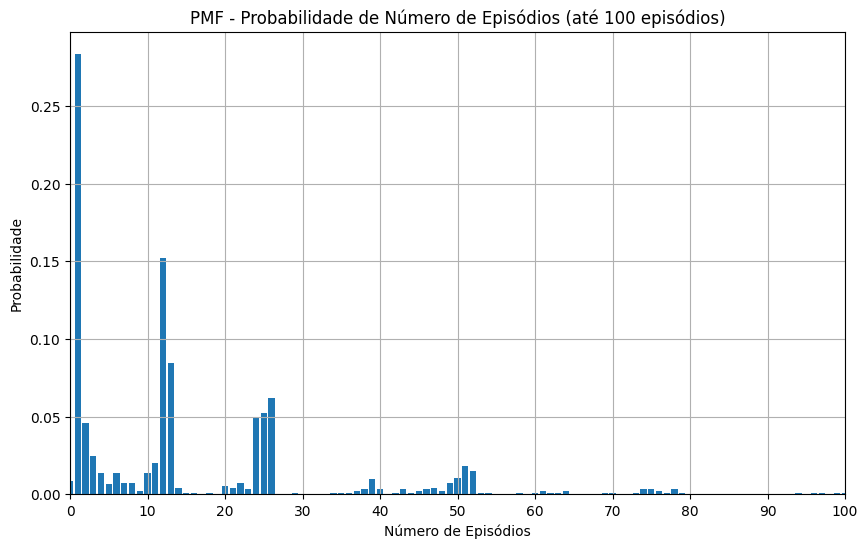

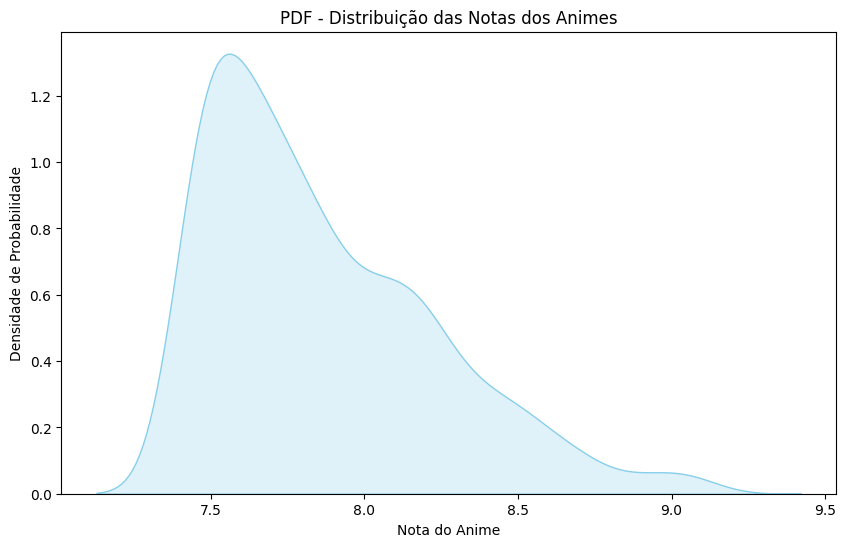

In [49]:
# Filtrando animes com número de episódios até 100 para manter o gráfico mais próximo
X_filtered = anime_data[anime_data['Num. of episodes'] <= 100]['Num. of episodes']

# Definindo a função de massa de probabilidade (PMF) para X filtrado
pmf_X_filtered = X_filtered.value_counts(normalize=True).sort_index()

# Plotando a PMF de X (Número de episódios filtrado até 100)
plt.figure(figsize=(10,6))
plt.bar(pmf_X_filtered.index, pmf_X_filtered.values)
plt.title('PMF - Probabilidade de Número de Episódios (até 100 episódios)')
plt.xlabel('Número de Episódios')
plt.ylabel('Probabilidade')
plt.xlim(0, 100)  # Limitando o eixo X para mostrar episódios de 1 a 100
plt.xticks(range(0, 101, 10))  # Ajustando os ticks no eixo X
plt.grid(True)
plt.show()
#    Y: Nota do anime (variável aleatória contínua).
# Definindo a variável aleatória Y (Nota do anime)
Y = anime_data['Score']

# Definindo a função de densidade de probabilidade (PDF) para Y
plt.figure(figsize=(10,6))
sns.kdeplot(Y, fill=True, color='skyblue')
plt.title('PDF - Distribuição das Notas dos Animes')
plt.xlabel('Nota do Anime')
plt.ylabel('Densidade de Probabilidade')
plt.show()


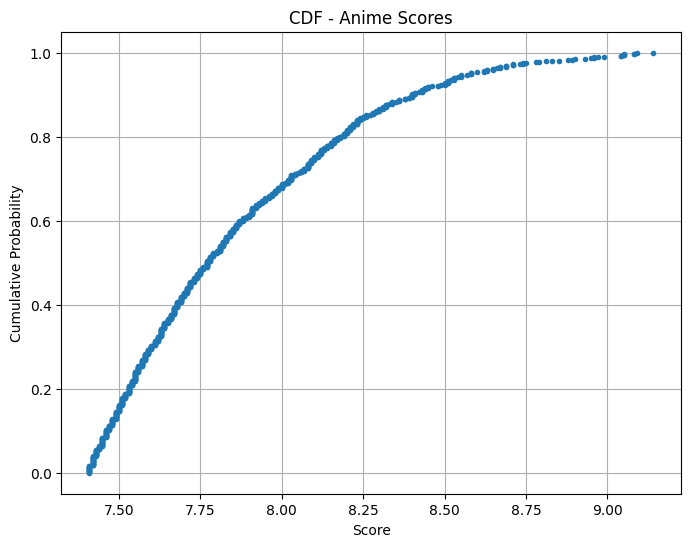

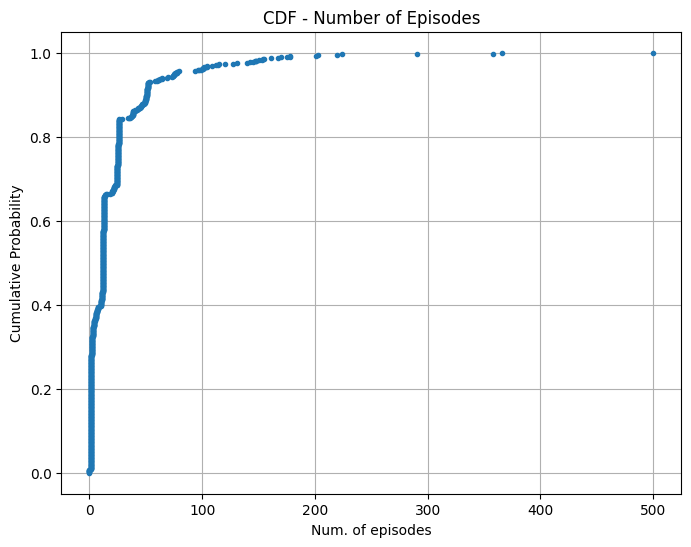

In [50]:
def plot_cdf(data, column_name, title):
    # Ordenar os valores da coluna
    sorted_data = np.sort(data[column_name].dropna())
    # Calcular a CDF
    y_vals = np.arange(1, len(sorted_data)+1) / len(sorted_data)

    # Plotar a CDF
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_data, y_vals, marker='.', linestyle='none')
    plt.title(f'CDF - {title}')
    plt.xlabel(column_name)
    plt.ylabel('Cumulative Probability')
    plt.grid(True)
    plt.show()

# 1. CDF da pontuação (Score)
plot_cdf(anime_data, 'Score', 'Anime Scores')

# 2. CDF do número de episódios (Num. of episodes)
plot_cdf(anime_data, 'Num. of episodes', 'Number of Episodes')

# **9. Simple Graphs**



---

## Bar Chart - Types of Anime

A bar chart was created to analyze the distribution of anime types in the dataset. The majority are TV animes, the dominant type in the industry, followed by films that are gaining relevance as audiences prefer quicker, shorter works. ONA ranks last, being a recent production format that has increased with streaming platforms, yet remains a minority.

---

## Histogram - Number of Episodes

A histogram shows the frequency of animes by the number of episodes. Most animes have between 12 and 24 episodes, while only a few exceed 100 episodes. This suggests that well-received works are typically shorter, making them easier for audiences to follow.

---

## Scatter Plot - Popularity vs Rating

A scatter plot analyzes the relationship between anime popularity and ratings. It reveals that more popular animes generally receive higher ratings, while lesser-known works show greater variance. This suggests that popularity can indicate perceived quality, despite some high-rated lesser-known titles.

---

## Bar Chart - Animes by Demographic

A bar chart illustrates the number of animes produced for each demographic. Shounen dominates, followed by seinen and shoujo. The representation reflects a male-dominated audience, particularly among younger viewers. Animes aimed at children are less emphasized due to their limited decision-making autonomy.

---

## Box Plot - Ratings by Demographic

A box plot examines the distribution of ratings across different demographics. Seinen and josei show a broader range of ratings, while kids have a more concentrated distribution. This indicates that younger audiences are less critical, while older demographics tend to evaluate works more rigorously.

---


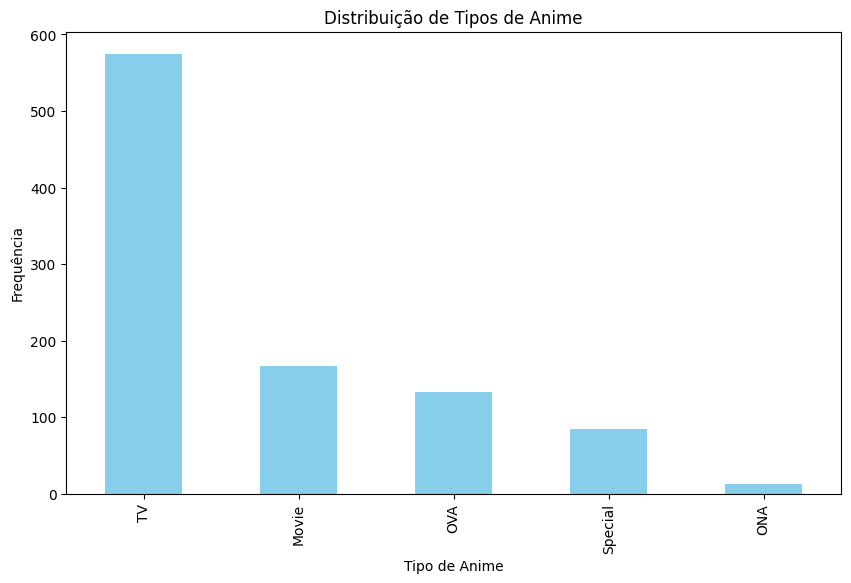

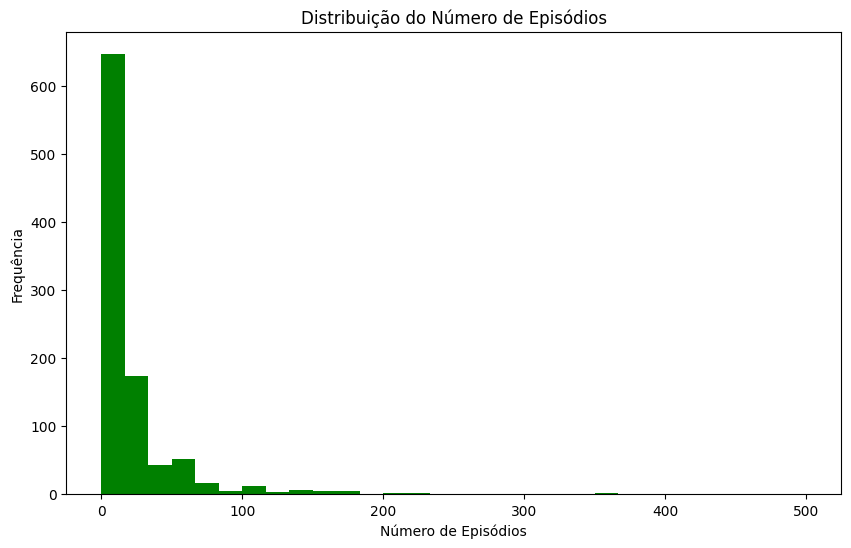

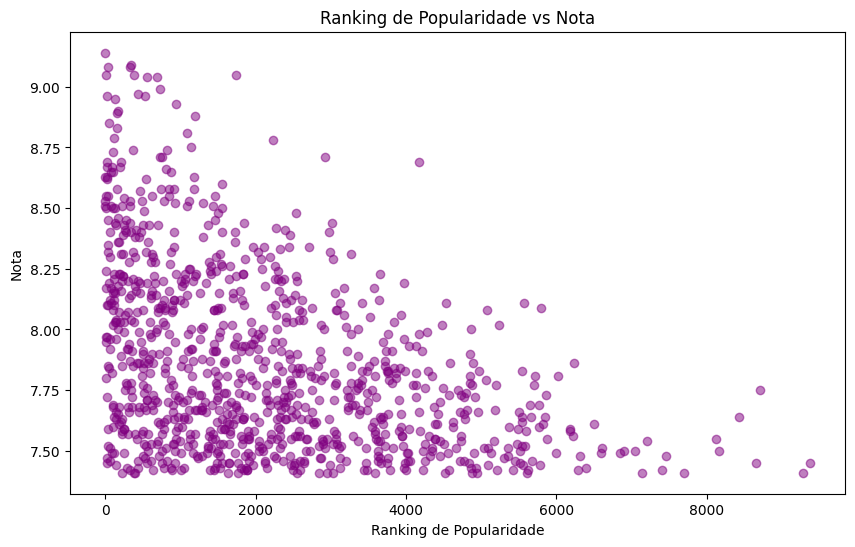

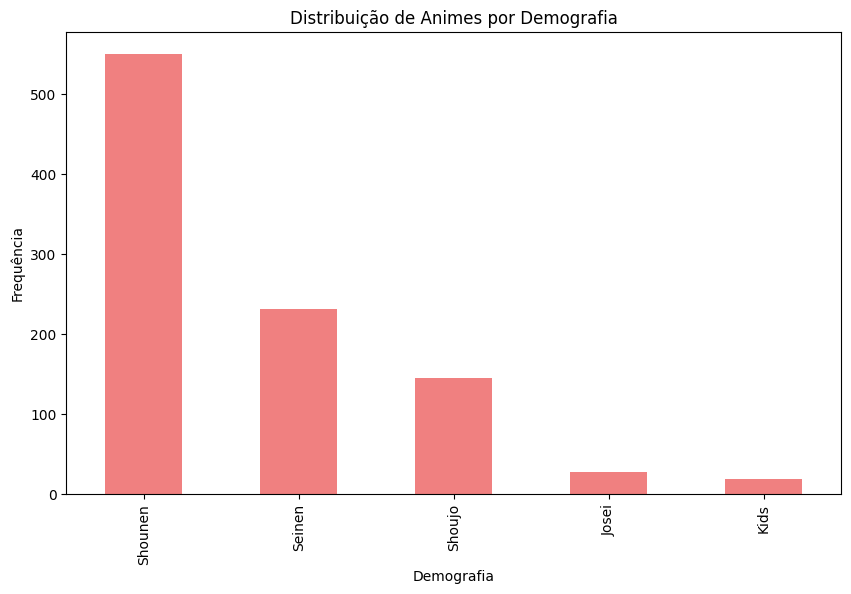

<Figure size 1000x600 with 0 Axes>

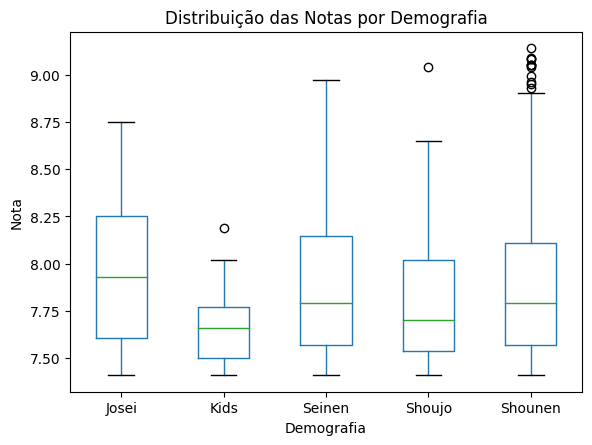

In [51]:
# 1. Gráfico de barras - Tipos de anime
anime_data['Type'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribuição de Tipos de Anime')
plt.xlabel('Tipo de Anime')
plt.ylabel('Frequência')
plt.show()

# 2. Histograma - Número de Episódios
anime_data['Num. of episodes'].plot(kind='hist', bins=30, figsize=(10, 6), color='green')
plt.title('Distribuição do Número de Episódios')
plt.xlabel('Número de Episódios')
plt.ylabel('Frequência')
plt.show()

# 3. Gráfico de Dispersão - Popularidade vs Nota
plt.figure(figsize=(10, 6))
plt.scatter(anime_data['Popularity Rank'], anime_data['Score'], alpha=0.5, color='purple')
plt.title('Ranking de Popularidade vs Nota')
plt.xlabel('Ranking de Popularidade')
plt.ylabel('Nota')
plt.show()

# 4. Gráfico de Barras - Número de animes por demografia
anime_data['Demographic'].value_counts().plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.title('Distribuição de Animes por Demografia')
plt.xlabel('Demografia')
plt.ylabel('Frequência')
plt.show()

# 5. Gráfico de Caixa - Notas por Demografia
plt.figure(figsize=(10, 6))
anime_data.boxplot(column='Score', by='Demographic', grid=False)
plt.title('Distribuição das Notas por Demografia')
plt.suptitle('')  # Remove o título automático do boxplot
plt.xlabel('Demografia')
plt.ylabel('Nota')
plt.show()
